In [1]:
import itertools
import numpy as np
import random
import pickle
import matplotlib.pyplot as plt
from math import *
import scipy
from tqdm import tqdm

from utils import *
from ODE_lag_utils_init import *

import matplotlib as mpl
import pandas as pd
import multiprocessing

# Set the default font and size
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.size'] = 16


In [6]:
# read in the data
path = "../data/seq_vs_co_phi"
t0 = 0.4
idxs = range(100)
poolsize = 10000
R = 4
history_phi = [[] for i in range(poolsize)]
history_div = [[] for i in range(poolsize)]
hist_phi_d = [[] for i in range(poolsize)]
hist_phi_c = [[] for i in range(poolsize)]
hist_frac_d = [[] for i in range(poolsize)]
for idx in tqdm(idxs):
    filename = os.path.join(path, f"onebyone_vary_phi_idx={idx}_lag={t0}.pkl")
    data = pickle.load(open(filename, "rb"))
    initials, histories = data["initials"], data["histories"]
    for h_idx, history in enumerate(histories):
        for step in history:
            phis_d = [spc.rho/R for spc in initials[h_idx][0] if (spc.id in step[1]["ids"] and spc.cat=="Seq")]
            phis_c = [spc.rho/R for spc in initials[h_idx][0] if (spc.id in step[1]["ids"] and spc.cat=="Cout")]
            history_phi[step[0]].extend(phis_d)
            hist_phi_d[step[0]].extend(phis_d)
            history_phi[step[0]].extend(phis_c)
            hist_phi_c[step[0]].extend(phis_c)

            div = len(step[1]["ids"])
            history_div[step[0]].append(div)

            hist_frac_d[step[0]].append(len(phis_d)/(len(phis_d)+len(phis_c)))

data = [history_phi, history_div, hist_phi_d, hist_phi_c, hist_frac_d]
pickle.dump(data, open("temp_history.pkl", "wb"))

  4%|▍         | 4/100 [00:03<01:34,  1.02it/s]


KeyboardInterrupt: 

In [2]:
data = pickle.load(open("../data/seq_vs_co_phi/temp_history.pkl", "rb"))
t0 = 0.05
poolsize = 10000
R = 4
history_phi, history_div, hist_phi_d, hist_phi_c, hist_frac_d = data
history_div = [[min(i, 4) for i in j] for j in history_div]

xs_phi = [i for i in range(poolsize) if history_phi[i]!=[]]
ys_phi = [np.mean(history_phi[i]) for i in xs_phi]
yerr_phi = [np.std(history_phi[i])/sqrt(len(history_phi[i])) for i in xs_phi]

xs_phi_d = [i for i in range(poolsize) if hist_phi_d[i]!=[]]
ys_phi_d = [np.mean(hist_phi_d[i]) for i in xs_phi_d]
yerr_phi_d = [np.std(hist_phi_d[i])/sqrt(len(hist_phi_d[i])) for i in xs_phi_d]

xs_phi_c= [i for i in range(poolsize) if hist_phi_c[i]!=[]]
ys_phi_c = [np.mean(hist_phi_c[i]) for i in xs_phi_c]
yerr_phi_c = [np.std(hist_phi_c[i])/sqrt(len(hist_phi_c[i])) for i in xs_phi_c]

xs_div = [i for i in range(poolsize) if history_div[i]!=[]]
ys_div = [np.mean([min(4, j) for j in history_div[i]]) for i in xs_div]
yerr_div = [np.std(history_div[i])/sqrt(len(history_div[i])) for i in xs_div]

xs_frac_d = [i for i in range(poolsize) if hist_phi_c[i]!=[] and hist_phi_d[i]!=[]]
ys_frac_d = [len(hist_phi_d[i])/len(history_phi[i]) for i in xs_frac_d]

(array([6., 3., 5., 1., 1., 1., 2., 2., 3., 1., 0., 3., 0., 1., 2., 0., 1.,
        0., 0., 1.]),
 array([2.10939440e-05, 1.84353963e-03, 3.66598531e-03, 5.48843100e-03,
        7.31087668e-03, 9.13332237e-03, 1.09557681e-02, 1.27782137e-02,
        1.46006594e-02, 1.64231051e-02, 1.82455508e-02, 2.00679965e-02,
        2.18904422e-02, 2.37128879e-02, 2.55353335e-02, 2.73577792e-02,
        2.91802249e-02, 3.10026706e-02, 3.28251163e-02, 3.46475620e-02,
        3.64700076e-02]),
 <BarContainer object of 20 artists>)

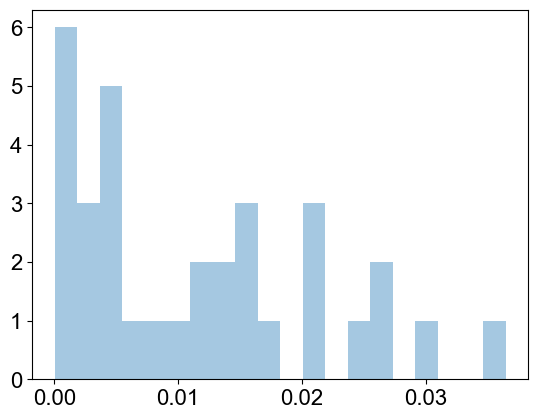

In [15]:
plt.hist(history_phi[-1], bins=20, alpha=0.4)

1 2
1 2
1 2
[1.0, 1.404109589041096, 1.5303030303030303, 1.5826771653543308, 1.6339285714285714, 1.8640776699029127, 1.7721518987341771, 1.9102564102564104, 1.9863013698630136, 1.873015873015873, 2.189189189189189, 2.1584158415841586, 2.32, 2.119565217391304, 2.2580645161290325, 2.458715596330275, 2.326923076923077, 2.4479166666666665, 2.386138613861386, 2.564885496183206, 2.6914893617021276, 2.64, 2.811023622047244, 2.753731343283582, 2.9243697478991595, 3.0, 2.9652777777777777, 3.2158273381294964, 3.3313953488372094, 3.23841059602649, 3.3333333333333335, 3.368131868131868, 3.4805194805194803, 3.459627329192547, 3.539325842696629, 3.5849056603773586, 3.5364583333333335, 3.6443298969072164, 3.6192893401015227, 3.6831683168316833, 3.7414634146341466, 3.8267326732673266, 3.818681318681319, 3.8215962441314555, 3.8097560975609754, 3.8634361233480177, 3.8983957219251337, 3.9424778761061945, 3.9064039408866993, 3.904382470119522, 3.954081632653061, 3.951111111111111, 3.9545454545454546, 3.92

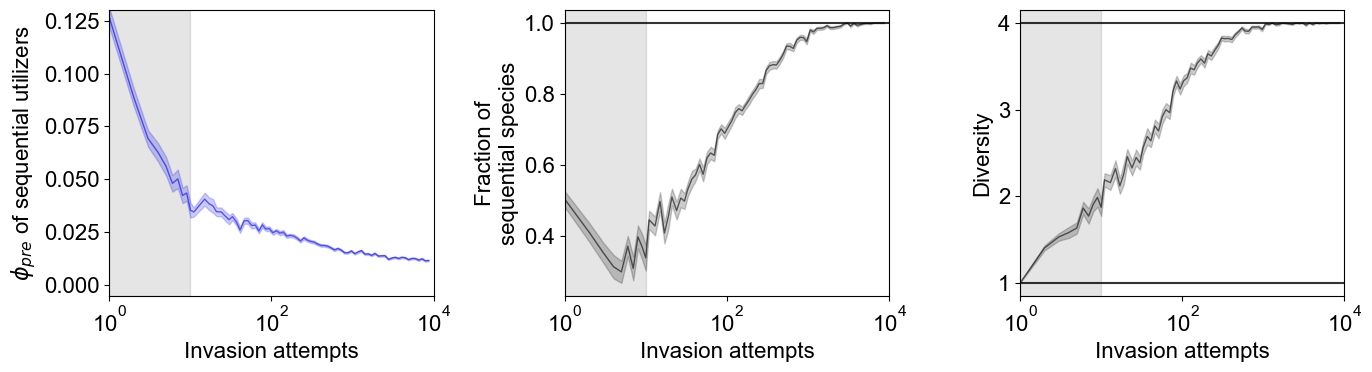

In [4]:
def moving_average(data, scale):
    # this is a log moving avr
    xs = []
    ys = []
    yerrs = []
    for i in tqdm(range(len(data))):
        wleft = round(i/scale)
        wright = max(wleft+1, round(i*scale))
        if(wleft>=0 and wright<=len(data)):
            xs.append(i+1)
            samples = sum(data[wleft:wright], [])
            ys.append(np.mean(samples))
            yerrs.append(2*np.std(samples)/sqrt(len(samples)))
    return xs, ys, yerrs

def binned_average(data, scale):
    xs, ys = [], []
    yerrs = []
    begin, end = floor(scale**0), ceil(scale**1)
    print(begin, end)
    while end<len(data):
        xs.append(begin)
        samples = sum(data[begin-1:end-1], [])
        ys.append(np.mean(samples))
        yerrs.append(np.std(samples)/sqrt(len(samples)))
        begin = end
        end = ceil(end*scale)
    return xs, ys, yerrs

fig, axs = plt.subplots(1, 3, figsize=(14, 4))

# xs_phi, ys_phi, yerrs_phi = moving_average(history_phi, 1.2)
# xs_phi, ys_phi, yerrs_phi = binned_average(history_phi, 1.1)
# axs[0].plot(xs_phi, ys_phi, color="k", alpha=0.6, linewidth=1, label="All")
# axs[0].fill_between(xs_phi, [ys_phi[i]-yerrs_phi[i] for i in range(len(ys_phi))], 
#                  [ys_phi[i]+yerrs_phi[i] for i in range(len(ys_phi))], color="k", alpha=0.2)
xs_phi, ys_phi, yerrs_phi = binned_average(hist_phi_d, 1.1)
axs[0].plot(xs_phi, ys_phi, color="b", alpha=0.6, linewidth=1, label="Sequential")
axs[0].fill_between(xs_phi, [ys_phi[i]-yerrs_phi[i] for i in range(len(ys_phi))], 
                 [ys_phi[i]+yerrs_phi[i] for i in range(len(ys_phi))], color="b", alpha=0.2)
# xs_phi, ys_phi, yerrs_phi = binned_average(hist_phi_c, 1.1)
# axs[0].plot(xs_phi, ys_phi, color="r", alpha=0.6, linewidth=1, label="Coutilizing")
# axs[0].fill_between(xs_phi, [ys_phi[i]-yerrs_phi[i] for i in range(len(ys_phi))], 
#                  [ys_phi[i]+yerrs_phi[i] for i in range(len(ys_phi))], color="r", alpha=0.2)
axs[0].set_ylim(-0.005, .13)
axs[0].set_xlim(1, 1e4)
# plt.axhline(0, color="k", alpha=0.8)
# plt.axhline(0.125, color="k", alpha=0.8)
axs[0].set_xscale("log")
axs[0].set_xlabel("Invasion attempts")
axs[0].set_ylabel("$\phi_{pre}$ of sequential utilizers")
axs[0].axvspan(1, 10, color="k", alpha=0.1)
# plt.legend()

# xs_d, ys_d, yerrs_d = moving_average(hist_frac_d, 1.2)
xs_d, ys_d, yerrs_d = binned_average(hist_frac_d, 1.1)
# plt.errorbar(xs_d, ys_d, yerr=yerrs_d, color="k", alpha=0.4)
axs[1].plot(xs_d, ys_d, color="k", alpha=0.6, linewidth=1)
axs[1].fill_between(xs_d, [ys_d[i]-yerrs_d[i] for i in range(len(ys_d))], 
                 [ys_d[i]+yerrs_d[i] for i in range(len(ys_d))], color="k", alpha=0.2)
axs[1].set_xscale("log")
axs[1].axhline(1, color="k", alpha=0.8)
axs[1].set_xlim(1, 1e4)
axs[1].set_xlabel("Invasion attempts")
axs[1].set_ylabel("Fraction of\nsequential species")
axs[1].axvspan(1, 10, color="k", alpha=0.1)

xs_div, ys_div, yerrs_div = binned_average(history_div, 1.1)
# plt.errorbar(xs_d, ys_d, yerr=yerrs_d, color="k", alpha=0.4)
print(ys_div)
axs[2].plot(xs_div, ys_div, color="k", alpha=0.6, linewidth=1)
axs[2].fill_between(xs_div, [ys_div[i]-yerrs_div[i] for i in range(len(ys_div))], 
                 [ys_div[i]+yerrs_div[i] for i in range(len(ys_div))], color="k", alpha=0.2)
axs[2].set_xscale("log")
axs[2].axhline(1, color="k", alpha=0.8)
axs[2].axhline(4, color="k", alpha=0.8)
axs[2].set_xlabel("Invasion attempts")
axs[2].set_ylabel("Diversity")
axs[2].axvspan(1, 10, color="k", alpha=0.1)
axs[2].set_xlim(1, 1e4)

fig.tight_layout() 
plt.savefig("../figures/vary_phi.pdf", bbox_inches="tight")